Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 5th Semester                                           
Batch: I-3            
                                                                       Date: 17/9/2022       
Subject: DL
###Assignment-7

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
from keras.datasets import mnist

(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [17]:
xtrain.shape

(60000, 28, 28)

In [18]:
ytrain.shape

(60000,)

In [19]:
xtest.shape

(10000, 28, 28)

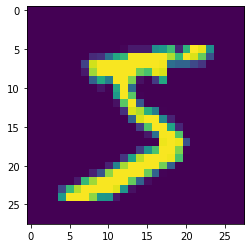

In [20]:
plt.imshow(xtrain[0])

In [21]:
#build ip vector
x_train = xtrain.reshape(xtrain.shape[0],28,28,1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
x_train=x_train.astype('float32')
x_test=xtest.astype('float32')

In [24]:
x_train /= 255
x_test /= 255

In [26]:
#one hot encoding for ytrain ytest
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)

In [27]:
ytrain = ytrain.reshape((-1,1))
y_onehot1 = onehot.fit_transform(ytrain)
ytest = ytest.reshape((-1,1))
y_onehot2 = onehot.fit_transform(ytest)

In [28]:
y_onehot1.shape

(60000, 10)

In [29]:
y_onehot1

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
y_onehot2.shape

(10000, 10)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model1=Sequential()
#conv layer
model1.add(Conv2D(30, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))

In [36]:
#pooling layer
model1.add(MaxPool2D(pool_size=(2,2)))

#flatten
model1.add(Flatten())

#dense layer
model1.add(Dense(100,activation='relu'))

In [37]:
#output
model1.add(Dense(10,activation='softmax'))

In [38]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 30)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5070)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               507100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
________________________________________________

In [42]:
model1.compile(loss='CategoricalCrossentropy', metrics=['accuracy'])
history1=model1.fit(xtrain,y_onehot1, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4441 - accuracy: 0.9452
Epoch 2/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0749 - accuracy: 0.9800
Epoch 3/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0561 - accuracy: 0.9859
Epoch 4/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0465 - accuracy: 0.9882
Epoch 5/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0385 - accuracy: 0.9906
Epoch 6/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0345 - accuracy: 0.9916
Epoch 7/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0304 - accuracy: 0.9929
Epoch 8/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0262 - accuracy: 0.9941
Epoch 9/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0244 - accuracy: 0.9948
Epoch 10/20
1875/1875 [==============================] - 35s 19m

In [57]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
xtrain = xtrain / 255.0
xtest = xtest / 255.0
xtrain = tf.expand_dims(xtrain, 3)
xtest = tf.expand_dims(xtest, 3)
val_x = xtrain[:5000]
val_y = ytrain[:5000]

In [58]:
#Implementing LeNet Architecture
from tensorflow import keras
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [59]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [60]:
lenet_5_model.fit(x_train, ytrain, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2244 - accuracy: 0.9325 - val_loss: 0.0850 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.0566 - val_accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0595 - accuracy: 0.9813 - val_loss: 0.0403 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0278 - val_accuracy: 0.9914


In [61]:
lenet_5_model.evaluate(xtest, ytest)

313/313 [==============================] - 3s 11ms/step - loss: 0.0531 - accuracy: 0.9830


[0.05307375639677048, 0.9829999804496765]

#Conclusion:
1) Using more number of filters in model increases the total parameters in the network.                         
2) We got a better accuracy of 99.91 % in normal CNN model as compared to LeNet-5 with 98.3 % accuracy.